In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('./Datasets/bank_churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 11)

In [11]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

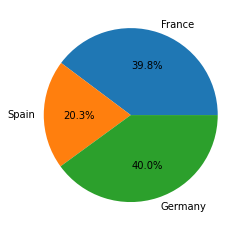

In [42]:
fr_exited = len(df[(df.Geography == 'France') & (df.Exited == 1)])
sp_exited = len(df[(df.Geography == 'Spain') & (df.Exited == 1)])
gr_exited = len(df[(df.Geography == 'Germany') & (df.Exited == 1)])

plt.pie([fr_exited,sp_exited,gr_exited], labels=['France','Spain','Germany'],autopct='%1.1f%%')
plt.show()

In [43]:
df.drop(['Geography'], axis='columns', inplace=True)

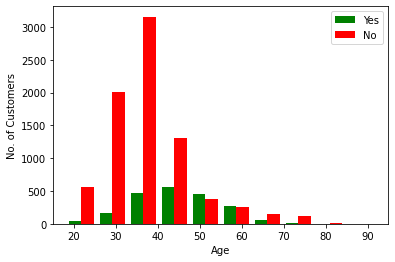

In [38]:
age_exited_yes = df.Age[df.Exited == 1]
age_exited_no = df.Age[df.Exited == 0]

plt.xlabel('Age')
plt.ylabel("No. of Customers")
plt.hist([age_exited_yes,age_exited_no], color=['green','red'], label=['Yes','No'])
plt.legend()
plt.show()

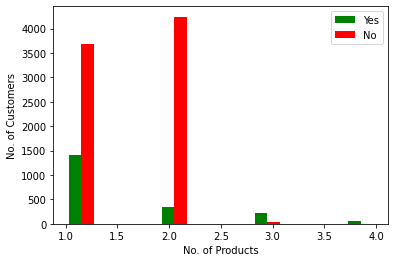

In [48]:
products_exited_yes = df.NumOfProducts[df.Exited == 1]
products_exited_no = df.NumOfProducts[df.Exited == 0]

plt.xlabel('No. of Products')
plt.ylabel("No. of Customers")
plt.hist([products_exited_yes,products_exited_no], color=['green','red'], label=['Yes','No'])
plt.legend()
plt.show()

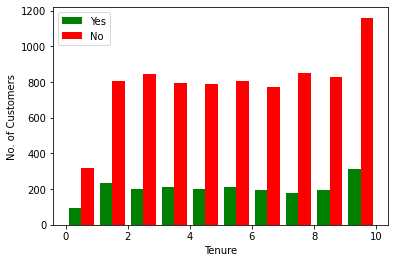

In [45]:
tenure_exited_yes = df.Tenure[df.Exited == 1]
tenure_exited_no = df.Tenure[df.Exited == 0]

plt.xlabel('Tenure')
plt.ylabel("No. of Customers")
plt.hist([tenure_exited_yes,tenure_exited_no], color=['green','red'], label=['Yes','No'])
plt.legend()
plt.show()

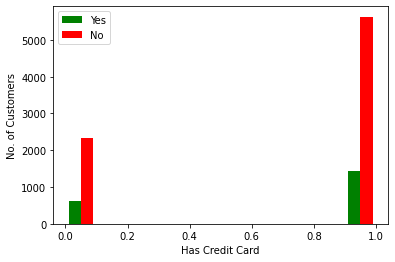

In [49]:
crCard_exited_yes = df.HasCrCard[df.Exited == 1]
crCard_exited_no = df.HasCrCard[df.Exited == 0]

plt.xlabel('Has Credit Card')
plt.ylabel("No. of Customers")
plt.hist([crCard_exited_yes,crCard_exited_no], color=['green','red'], label=['Yes','No'])
plt.legend()
plt.show()

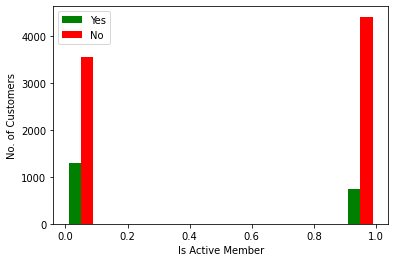

In [50]:
activeMem_exited_yes = df.IsActiveMember[df.Exited == 1]
activeMem_exited_no = df.IsActiveMember[df.Exited == 0]

plt.xlabel('Is Active Member')
plt.ylabel("No. of Customers")
plt.hist([activeMem_exited_yes,activeMem_exited_no], color=['green','red'], label=['Yes','No'])
plt.legend()
plt.show()

In [47]:
df.dtypes

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [51]:
df.Gender.replace({'Male': 1, 'Female':0}, inplace=True)

In [52]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [53]:
df.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [54]:
cols_to_scale = ['CreditScore','Balance','EstimatedSalary','Age','Tenure']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [55]:
X = df.drop(['Exited'], axis='columns')
y = df.Exited

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

In [81]:
model = keras.Sequential([
    keras.layers.Dense(9, input_shape=(9,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile( optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
219/219 [==============================] - 1s 1ms/step - loss: 0.5766 - accuracy: 0.7189
Epoch 2/200
219/219 [==============================] - 0s 979us/step - loss: 0.4991 - accuracy: 0.7944
Epoch 3/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4800 - accuracy: 0.7954
Epoch 4/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4682 - accuracy: 0.7961
Epoch 5/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.8019
Epoch 6/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.8037
Epoch 7/200
219/219 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.8060
Epoch 8/200
219/219 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8080
Epoch 9/200
219/219 [==============================] - 1s 3ms/step - loss: 0.4415 - accuracy: 0.8083
Epoch 10/200
219/219 [==============================] - 1s 3ms/step - loss: 0.4383 - accu

219/219 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8480
Epoch 160/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3605 - accuracy: 0.8477
Epoch 161/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3610 - accuracy: 0.8486
Epoch 162/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8479
Epoch 163/200
219/219 [==============================] - 0s 970us/step - loss: 0.3601 - accuracy: 0.8491
Epoch 164/200
219/219 [==============================] - 0s 988us/step - loss: 0.3598 - accuracy: 0.8501
Epoch 165/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8496
Epoch 166/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.8501
Epoch 167/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3592 - accuracy: 0.8491
Epoch 168/200
219/219 [==============================] - 0s 1ms/step - loss: 0.3593

In [82]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 860us/step - loss: 0.3650 - accuracy: 0.8537


[0.3649669289588928, 0.8536666631698608]

In [83]:
y_pred = model.predict(X_test)
y_pred

array([[0.02182168],
       [0.07603955],
       [0.14344764],
       ...,
       [0.01727927],
       [0.00684249],
       [0.12182131]], dtype=float32)

In [84]:
y_preds = []
for y in y_pred:
    if y>0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2403
           1       0.74      0.41      0.53       597

    accuracy                           0.85      3000
   macro avg       0.80      0.69      0.72      3000
weighted avg       0.84      0.85      0.84      3000



In [86]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2318,   85],
       [ 354,  243]])>

Text(33.0, 0.5, 'true')

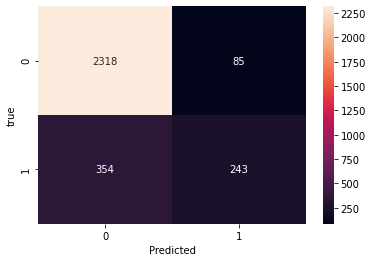

In [87]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("true")